In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
df=pd.read_csv('all-data.csv',encoding='latin-1',header=None,names=['sentiment','text'])
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(
    max_features=1000,
    stop_words='english'
)
X=tf.fit_transform(df['text']).toarray()

Text(0.5, 1.0, 'Dendrogram')

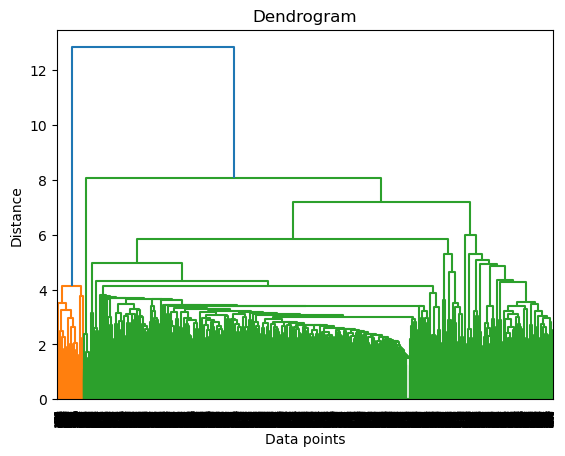

In [26]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.title("Dendrogram")

In [27]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=3,linkage='ward',metric='euclidean')
y_hc=ag.fit_predict(X)

In [29]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,y_hc)
print("Silhouette Score for Hierarchial Clustering",score)

Silhouette Score for Hierarchial Clustering 0.008750833995398864
